# Investigating Top Skills for Data Engineers 

Object of this analysis is to find out the needed skills for data engineers around the Europe. 

### Gathering Data

Data are gathered via web scraper (https://github.com/alpdal/linkedin_job_scraper). 

Scraper has a location parameter and because of personel preferences jobs are mainly collected from Istanbul, Germany, Netherlands, UK. However, Google search algorithm  returned jobs with another locations. No harm, we would like to see what skills are needed for data engineers. 

Some jobs like "Analytics Engineer" or "ETL Data Engineer" have different name from "Data Engineer" but their job definitions are similar. So, we will not exclude them. 

Let's explore what we have collected.

In [1]:
import pandas as pd 

path_name = r"C:\Users\alper\Linkedin_data\merged.csv"
column_names = ["Position", "Company", "Location", "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10"]
jobs = pd.read_csv(path_name, delimiter=',', header=None, names=column_names, encoding="ISO-8859-1")

print(jobs.shape)
jobs.head(15)

(235, 13)


,Position,Company,Location,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,Data Engineer (f/m/x),Amorelie,"Berlin, Berlin, Deutschland",SQL,Analytical Skills,Computer Science,Apache Spark,Easily Adaptable,Teamwork,Design,Data Processing,Analytics,NaN
1,Data Engineer - Berlin,iFindTech Ltd,"Berlin Area, Germany",Data Engineering,NoSQL,Java,Apache Spark,Hadoop,Big Data,Akka,Scala,NaN,NaN
2,Data Engineer (m/f/d),Munich Re (Group),"München, Bayern, Deutschland",SQL,System Development,SQL Server Reporting Services (SSRS),Analytical Skills,Insurance,Exploratory Data Analysis,Data Analysis,Data Integration,Data Analytics,"Extract, Transform, Load (ETL)"
3,Data Engineer,Zero to One Search | Recruitment Agency,"Nuremberg, Bavaria, Germany",Cloud Services,Internet of Things (IoT),Azure Data Factory,Denodo Platform,Data Mining,Azure IoT,Big Data,Data Lakes,Amazon Web Services (AWS),Azure Databricks
4,Data Engineer,g2 Recruitment Solutions,Stuttgart Region,Semiconductors,Test Development,Data Analytics,Measurements,Team Leadership,Data Science,Business Intelligence (BI),Analytics,Data Warehousing,NaN
5,Data Engineer,Glocomms,"Berlin, Germany",Data Engineering,American Welding Society (AWS),Data Visualization,Data Analytics,Data Mining,Microsoft Azure,Data Infrastructure,Business Intelligence (BI),Analytics,Airflow
6,Data Engineer,ICIS,"Karlsruhe, Baden-Württemberg, Germany",English,Python (Programming Language),SQL,Analytical Skills,Writing,XML,Problem Solving,Leadership,Data Modeling,German
7,Senior Account Executive,Syncsort,"Munich, Bavaria, Germany",Cloud Computing,Channel Partners,Managed Services,Pre-sales,Data Integration,Architecture,High Availability,Microsoft Dynamics CRM,Data Quality,Professional Services
8,Senior Data Engineer - Kafka / Spark / AWS / J...,Holidu,"München, Bayern, Deutschland",iOS,PostgreSQL,Computer Science,Docker Products,ElasticSearch,Jenkins,Amazon Web Services (AWS),Apache,Analytics,NaN
9,Data Engineer,ICIS,"Karlsruhe, Baden-Württemberg, Germany",English,Python (Programming Language),SQL,Analytical Skills,Writing,XML,Problem Solving,Leadership,Data Modeling,German


We have 235 jobs with position, company, location and needed skills information.

### Cleaning Data 

The dataset includes job posts that we do not want to add our analysis. We will include the posts with "data" substring and exclude ones with "scientist", "manager" or "science".

In [2]:
# include
jobs_clean = jobs[jobs["Position"].str.contains(pat="data", case=False)].copy().reset_index(drop=True)

# exclude
words_excluded = ["science", "manager", "scientist"]
jobs_clean =  jobs_clean[~jobs_clean["Position"].str.contains(pat='|'.join(words_excluded), case=False)].copy().reset_index(drop=True)

print(jobs_clean.shape)
jobs_clean.head()

(156, 13)


,Position,Company,Location,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,Data Engineer (f/m/x),Amorelie,"Berlin, Berlin, Deutschland",SQL,Analytical Skills,Computer Science,Apache Spark,Easily Adaptable,Teamwork,Design,Data Processing,Analytics,NaN
1,Data Engineer - Berlin,iFindTech Ltd,"Berlin Area, Germany",Data Engineering,NoSQL,Java,Apache Spark,Hadoop,Big Data,Akka,Scala,NaN,NaN
2,Data Engineer (m/f/d),Munich Re (Group),"München, Bayern, Deutschland",SQL,System Development,SQL Server Reporting Services (SSRS),Analytical Skills,Insurance,Exploratory Data Analysis,Data Analysis,Data Integration,Data Analytics,"Extract, Transform, Load (ETL)"
3,Data Engineer,Zero to One Search | Recruitment Agency,"Nuremberg, Bavaria, Germany",Cloud Services,Internet of Things (IoT),Azure Data Factory,Denodo Platform,Data Mining,Azure IoT,Big Data,Data Lakes,Amazon Web Services (AWS),Azure Databricks
4,Data Engineer,g2 Recruitment Solutions,Stuttgart Region,Semiconductors,Test Development,Data Analytics,Measurements,Team Leadership,Data Science,Business Intelligence (BI),Analytics,Data Warehousing,NaN


In [3]:
jobs_clean["Position"].value_counts().head(7)

Data Engineer                                 66
Big Data Engineer                             12
Senior Data Engineer                          11
Junior Big Data Engineer                       7
Data Engineer - Contract                       3
Senior Data Engineer / AI Enabling Enginee     2
Senior Big Data Engineer                       2
Name: Position, dtype: int64

We have 156 posts remained. It seems like there is not so much irrelevant post. We can move on to the analysis step. 

### Finding Out Skills 

We will gather all the skills into a list from last 10 columns (S1, S2...S10).

In [4]:
skills = jobs_clean.iloc[:, 3:].unstack().reset_index(drop=True)
print(skills.value_counts(dropna=False).head(30))

NaN                               94
SQL                               60
Python (Programming Language)     56
Big Data                          52
Apache Spark                      48
Amazon Web Services (AWS)         43
Analytics                         43
Data Mining                       43
Data Engineering                  39
Data Science                      34
Analytical Skills                 32
Hadoop                            30
Data Analytics                    30
Extract, Transform, Load (ETL)    28
NoSQL                             24
Data Modeling                     23
English                           22
Data Warehousing                  21
Data Pipelines                    20
Java                              18
Machine Learning                  17
Microsoft Azure                   17
Scala                             16
Databases                         15
Apache Kafka                      15
Computer Science                  15
Data Visualization                14
B

SQL, Python and Big Data looks like important skills. 

The first skill related with a service is Apache Spark. 
However, it appears like 9 recruiters made mistake. There is confusion between "American Welding Society (AWS)" and "Amazon Web Services (AWS)". We should fix this. 

Some posts do not have 10 skills. 94 null values are derived from it. 

In [5]:
skills = skills.str.replace("American Welding Society", "Amazon Web Services").copy()

# correct dataframe too
for i in range(1, 11):
    jobs_clean["S{}".format(i)] = jobs_clean["S{}".format(i)].str.replace("American Welding Society", "Amazon Web Services").copy()
    
skills.value_counts(dropna = False).head(20)

NaN                               94
SQL                               60
Python (Programming Language)     56
Amazon Web Services (AWS)         52
Big Data                          52
Apache Spark                      48
Data Mining                       43
Analytics                         43
Data Engineering                  39
Data Science                      34
Analytical Skills                 32
Data Analytics                    30
Hadoop                            30
Extract, Transform, Load (ETL)    28
NoSQL                             24
Data Modeling                     23
English                           22
Data Warehousing                  21
Data Pipelines                    20
Java                              18
dtype: int64

Now, our winner service is AWS. Besides SQL and Python, AWS and Apache Spark skills are important for data engineers. 

### Skills by Countries 

We have location information. So, we can do our analysis by countries. 

However, in this section, we would like to find out the skills that leveragable in short term and can be classifed as "Tools & Technology" in LinkedIn. In this case, we will filter some sector-oriented skills and some conceptual skills that we expect the data engineer attendee should be familiar already, including "Data Engineering", "Big Data", etc. 

In [6]:
skills_to_filter = [
    "Big Data", "Data Mining", "Analytics", "Data Engineering", "Data Science", "Data Modeling",
    "Data Analytics", "Data Pipelines", "Machine Learning", "Data Analysis", "Analytical Skills",
    "Data Warehousing", "Data Architecture", "Business Intelligence (BI)", "Computer Science",
    "English", "Databases", "Data Management", "Extract, Transform, Load (ETL)", "Engineers",  
    "Business", "Problem Solving", "Data Infrastructure", "Artificial Intelligence (AI)", "German", 
    "Customer Analysis", "Engineering", "Database Systems", "Data Quality", "Software Development", 
    "Data Integration", "Team Spirit", "Data Models", "Open Source Software", "Programming", 
    "Data Governance", "Scripting", "Data Manipulation", "Mathematics", "Agile Methodologies",
    "Human Resources (HR)", "Leadership", "Continuous Integration and Continuous Delivery (CI/CD)"
]

We will parse the "Location" column. Generally last item is the country name. 

In [7]:
# last item is country name in string list
countries = jobs_clean["Location"].str.split(",").map(lambda lst: lst[-1])
# clean whitespaces
jobs_clean["Country"] = countries.str.strip()

jobs_clean["Country"].value_counts().head(15)

United Kingdom               38
Belgium                      17
Germany                      15
Turkey                       14
Deutschland                   9
Finland                       9
Netherlands                   9
Illinois                      3
England Metropolitan Area     3
Ireland                       3
Israel                        3
Poland                        3
Stuttgart Region              2
India                         2
Bulgaria                      2
Name: Country, dtype: int64

There are posts with country name as Germany and Deutschland. We can merge them. 

And, we can change some area names that we know to country names. 

In [8]:
vals_to_replace = {
    # merge deutschland and germany
    "Deutschland": "Germany",
    # area names to country names
    "Helsinki Metropolitan Area": "Finland",
    "England Metropolitan Area": "United Kingdom",
    "Stuttgart Region": "Germany",
    "NL": "Netherlands"
}

# replace the word in country column if exist in dictionary above
def replacer(word, replace_dict):
    if word in replace_dict:
        return replace_dict[word]
    else:
    # else don't change    
        return word

jobs_clean["Country"] = jobs_clean["Country"].apply(lambda x: replacer(x, vals_to_replace))

jobs_clean["Country"].value_counts().head(10)

United Kingdom    41
Germany           26
Belgium           17
Turkey            14
Finland           11
Netherlands       10
Poland             3
Israel             3
Ireland            3
Illinois           3
Name: Country, dtype: int64

Only first 6 countries have enough posts to analyse. 

In [9]:
first_six = list(jobs_clean["Country"].value_counts().head(6).index)
skills_by_country = {}

# collect skills as percentages by countries in a dict
for country_name in first_six:
    skill_set = jobs_clean[jobs_clean["Country"] == country_name].iloc[:, 3:-1].unstack().reset_index(drop = True)
    # filter the skills
    skill_set = skill_set[~skill_set.isin(skills_to_filter)].copy()
    skills_by_country[country_name] = skill_set.value_counts(normalize = True).head(10) * 100

### Data Visualization

We will visualize the skills needed for first six countries.

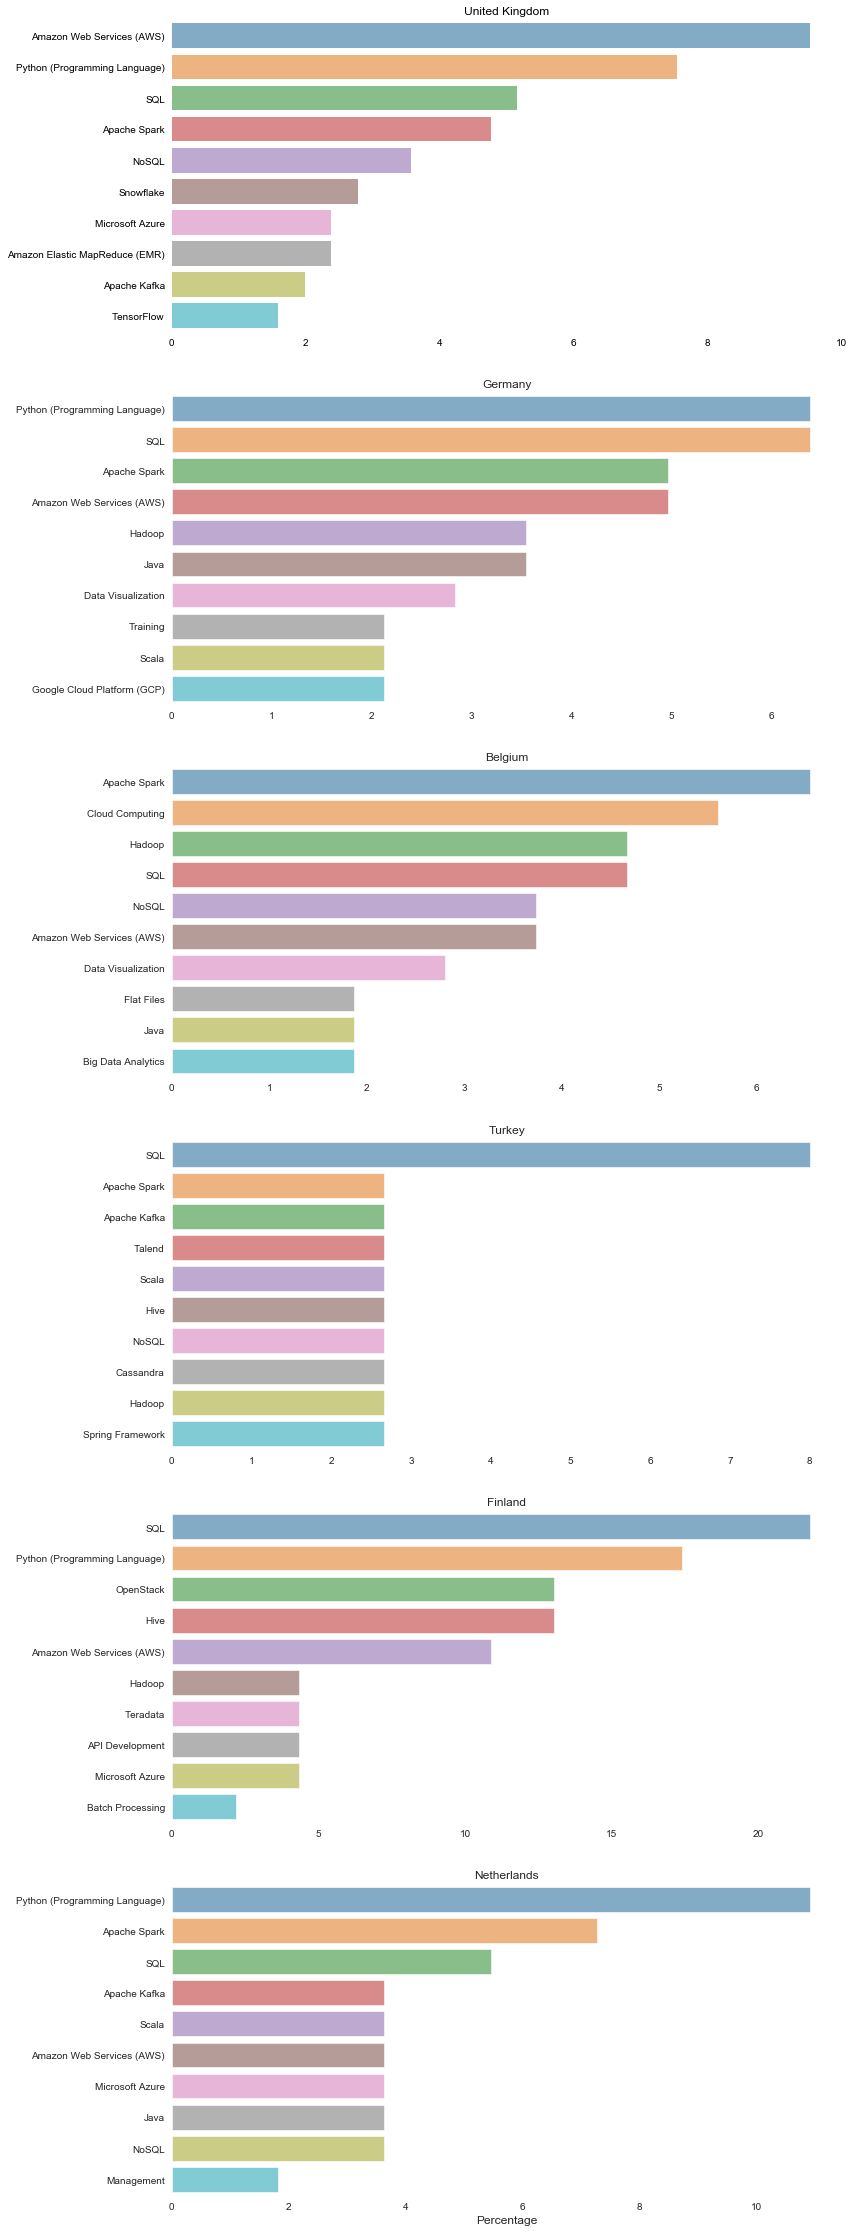

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize = (12, 40))

# generate 6 subplots for 6 countries
for c in range(0,6):
    ax = fig.add_subplot(6, 1, c+1)
    
    sns.barplot(skills_by_country[first_six[c]].values, skills_by_country[first_six[c]].index, alpha=0.6, ax=ax)
    sns.set_style("ticks")
    plt.title(first_six[c])
    # plt.ylabel('Skills', fontsize=12)

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.tick_params(bottom=False, top=False, left=False, right=False)

# xlabel will be display at end of figure
plt.xlabel('Percentage', fontsize=12)
plt.show()

AWS looks very popular in UK. However, Belgian companies seems like focusing on Apache Spark and Cloud Computing. In addition, as everywhere else, SQL and Python is important for Germany.

For the last three countries, there are more balanced distributions because of limited data. But we can say that Python, SQL, AWS, NoSQL, Big Data and Stream services (Spark, Hadoop, etc.) are some important skills for data engineers in everywhere. 